In [1]:
#all imports for project 
from pathlib import Path 
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")


np.random.seed(100)


In [2]:
def get_split_data():
    '''this function will retrieve, clean and split the data'''
    # reading data into python from excel 
    df = pd.read_excel('Adidas_US_Sales_Datasets.xlsx')

    #replace spaces with underscore
    df.columns = [column.replace(' ','_').lower() for column in df]
    # dropping columns 
    df = df.drop(columns= ['unnamed:_0','invoice_date','operating_profit','price_per_unit','units_sold','retailer_id','total_sales'])
    # have to get dummys for categorical variables 

    # Uses one-hot encoding to create dummies of string columns for future modeling 
    dummy_df = pd.get_dummies(df[['region','retailer','product','sales_method']], dummy_na=False, drop_first=[False])
    df = pd.concat([df, dummy_df], axis=1)

    #replace spaces with underscore
    df.columns = [column.replace(' ','_').lower() for column in df]
    
    # split data/ train, validate, test 
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
    
    return train,validate,test



In [3]:
#creating data set ready for statistical questions
train,validate, test = get_split_data()

## Target variable - Operating Margin
How much profit company makes on a dollar of sales after paying variable costs but before paying interest or tax.

## Data Dictionary 

| Feature | Definition |
|:--------|:-----------|
|Retailer| Specific store: Amazon, Foot Locker, Kohl's, Sports Direct, Walmart, West Gear|
|Region| Geographic Region in United States: Northeast, Midwest South, Southeast, West |
|Product| Products sold by retailer: men and women's footwear and apparel|
|Operating Margin| operating income/revenue|
|Sales Method | The method of sale: In Store, Online and Outlet |

## What are the median and mean Operating Margins? 

In [4]:
def table():
    ''' This function will create a table of information '''
    #calculating median of property values 
    median = train.operating_margin.median() 

    #calculating mean of property values 
    mean = train.operating_margin.mean()

    # difference between mean and median 
    difference = mean - median

    #provides data for table
    df = [["Median", median], 
        ["Mean", mean],
        ["Difference", difference]]
        
    #define header names
    col_names = ["Metric", "Value"]
  
    #display table
    print(tabulate(df, headers=col_names))   

In [5]:
table()

Metric         Value
----------  --------
Median      0.41
Mean        0.423395
Difference  0.013395


## Takeaways 
- Median and mean are not too far apart 
- For performance evaluation, significantly exceeding .423 is exceptional 



## Does region have a relationship with operating margin? 

In [6]:
def barplot(data,x,y,title):
    '''this function will create a barplot'''
    # barplot of region and operating margin 
    sns.barplot(data=data, x=x, y=y).set(title= title)


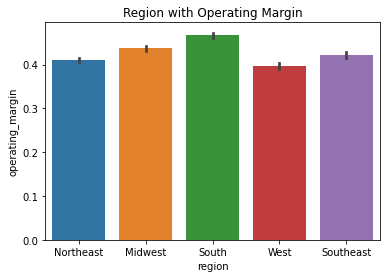

In [7]:
# barplot visual
barplot(train,"region","operating_margin","Region with Operating Margin")

In [8]:
# create dataframes of regions with their operating margin 
n_east = train[train.region == 'Northeast'].operating_margin
midwest = train[train.region == 'Midwest'].operating_margin
south = train[train.region == 'South'].operating_margin
west = train[train.region == 'West'].operating_margin
s_east= train[train.region == 'Southeast'].operating_margin


## Hypothesis

Ho: There is not a significant difference in the operating margin mean across Regions.<br>
Ha: Is there a significant difference in the operating margin mean across the Regions.

In [9]:
def anova_test(a,b,c,d,e):
    '''this function will provide the results of the ANOVA test'''
    # statistical test /#pearsonr test 
    results, p = stats.kruskal(a,b,c,d,e)

    # print results of statistical test 
    print(f'Kruska Result = {results:.4f}')
    print(f'p = {p}')

In [10]:
# statistical test evaluation
anova_test(n_east,midwest,south,west,s_east)

Kruska Result = 309.2166
p = 1.113012461973387e-65


##  Takeaways 

- South region has the highest operating margin 
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- Business takeaway, south region may be best region to continue to expand in


## come backs 
- place values on the bar charts 
- figure out how to better present region names next to variances 

## Is there a relationship between operating margin and Retailers? 

In [11]:
# barplot visualbarplot(train,"retailer", "operating_margin","Retailer Operating Margins")


In [12]:
# create dataframes of retailers with their operating margin 
sports_direct = train[train.retailer == 'Sports Direct'].operating_margin
walmart = train[train.retailer == 'Walmart'].operating_margin
foot_locker = train[train.retailer == 'Foot Locker'].operating_margin
amazon = train[train.retailer == 'Amazon'].operating_margin
west_gear= train[train.retailer == 'West Gear'].operating_margin
kohls= train[train['retailer'] == "Kohl's"].operating_margin

## Hypothesis

Ho: There is not a significant difference in the mean operating margin across Retailers.<br>
Ha: Is there a significant difference in the operating margin mean across Retailers.

In [13]:
def anova_test_six(a,b,c,d,e,f):
    """this function will run ANOVA test"""
    # statistical test 
    results, p = stats.kruskal(a,b,c,d,e,f)
    # print results of statistical test 
    print(f'Kruska Result = {results:.4f}')
    print(f'p = {p}')

In [14]:
anova_test_six(sports_direct,walmart,foot_locker,amazon,west_gear,kohls)

Kruska Result = 48.8301
p = 2.403965243243204e-09


## Takeaways 
- The retailer with the highest operating margin is sports_direct
- The remaining retailers have a similar operating margin 
- Walmart appears to be underperforming relative to its peers 
- retailer is a feature that should be considered for modeling 



## Is there a relationship between operating margin and sales method?

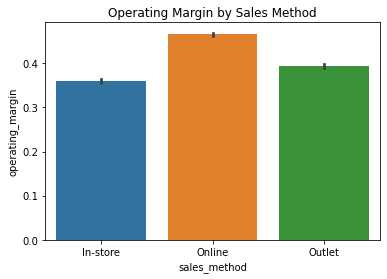

In [15]:
# barplot visual
barplot(train,"sales_method", "operating_margin","Operating Margin by Sales Method")

In [16]:
# create dataframes of sales-method with their operating margin 
in_store = train[train.sales_method == 'In-store'].operating_margin
online = train[train.sales_method == 'Online'].operating_margin
outlet = train[train.sales_method == 'Outlet'].operating_margin


In [17]:
# find variances of each region 
for df in (in_store,online,outlet):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.00519943845734698
0.00785635451027821
0.008511333987704333


## Hypothesis
    
Ho: There is not a significant difference in the mean operating margin across sales methods.<br>
Ha: There is a significant difference in the mean operating margin across sales methods.

In [18]:
# create dataframes of sales-method with their operating margin 
in_store = train[train.sales_method == 'In-store'].operating_margin
online = train[train.sales_method == 'Online'].operating_margin
outlet = train[train.sales_method == 'Outlet'].operating_margin

In [19]:
def anova_test_retailer(a,b,c):
    """this function will run ANOVA test"""   
    # statistical test 
    results, p = stats.kruskal(a,b,c)
    # print results of statistical test 
    print(f'Kruska Result = {results:.4f}')
    print(f'p = {p}')

In [20]:
anova_test_retailer(in_store,online,outlet)

Kruska Result = 1168.4619
p = 1.8695019652572764e-254


## Takeaways 
- Online Sales appears to have the highest operating margin 
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 

## Is there a significant difference in the mean operating margin across products?

In [21]:
# categories of products
# create dataframes of products with their operating margin 
men_athletic_footwear = train[train['product'] == "Men's Athletic Footwear"].operating_margin
men_apparel = train[train['product'] == "Men's Apparel"].operating_margin
women_street_footwear = train[train['product'] == "Women's Street Footwear"].operating_margin
women_athletic_footwear = train[train['product'] == "Women's Athletic Footwear"].operating_margin
men_street_footwear= train[train['product'] == "Men's Street Footwear"].operating_margin
women_apparel= train[train['product'] == "Women's Apparel"].operating_margin

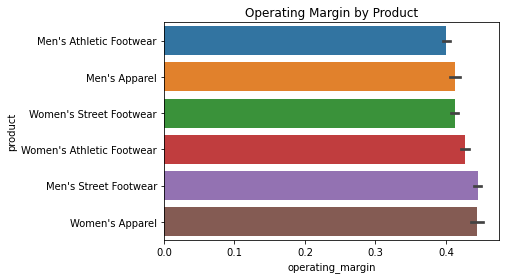

In [22]:
# barplot visual
barplot(train,"operating_margin","product","Operating Margin by Product")

In [23]:
# find variances of each region 
for df in (men_athletic_footwear,men_apparel,women_street_footwear,women_athletic_footwear,men_street_footwear,women_apparel):
    # printing number of unique values for each categorial variable 
    print( df.var())

0.006873635895635922
0.010847679758434843
0.006440051395693449
0.007837634332371796
0.006645535681142026
0.016536256603682378


## Hypothesis

Ho: There is not a significant difference in the operating margin mean across products.<br>
Ha: Is there a significant difference in the operating margin mean across the products

In [24]:
# statistical test 
anova_test_six(men_athletic_footwear,men_apparel,women_street_footwear,women_athletic_footwear,men_street_footwear,women_apparel)

Kruska Result = 167.5372
p = 2.4462474817537047e-34


## Takeaways 
- there is a relationship between product and operating margin 
- Apparel will be considered for modeling 
- Women's apparel and men's street footwear appear to have the highest profit margins


## Exploration Summary

- The median operating margin is 41%
- The mean property value is 42.3%
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- retailer is a feature that should be considered for modeling 
- The retailer with the highest operating margin is sports_direct
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 
- there is a relationship between product and operating margin 
- Product will be considered for modeling 


## Modeling

### Introduction

- I will use Root Mean Squared error as my evaluation metric
- My baseline model is created from the Root Mean Squared error (RMSE) of the median operating margin
- The best combination of features for modeling were south (region), online sales (method),  sports direct(retailer) and women's apparel and men's street footwear (products)  
- Models will be evaluated on train and validate data sets 
- The model that performs the best will be evaluated on the test data

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 3508 to 8653
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   retailer                           5402 non-null   object 
 1   region                             5402 non-null   object 
 2   state                              5402 non-null   object 
 3   city                               5402 non-null   object 
 4   product                            5402 non-null   object 
 5   operating_margin                   5402 non-null   float64
 6   sales_method                       5402 non-null   object 
 7   region_northeast                   5402 non-null   uint8  
 8   region_south                       5402 non-null   uint8  
 9   region_southeast                   5402 non-null   uint8  
 10  region_west                        5402 non-null   uint8  
 11  retailer_foot_locker               5402 non-null   ui

In [26]:
# creating train target variables in train, validate and test datasets
y_train = train['operating_margin']
y_validate = validate['operating_margin']
y_test = test['operating_margin']

In [27]:
# changing y train, validate and test into a dataframe to append the new column with predicted values 
y_train = pd.DataFrame(y_train)
y_validate= pd.DataFrame(y_validate)
y_test= pd.DataFrame(y_test)

## Baseline Model

In [49]:
from sklearn.metrics import mean_squared_error
def baseline_model():
    '''this function will create a baseline model'''
    # Predict property_value_pred_mean (not used in project)
    operating_margin_pred_mean = y_train['operating_margin'].mean()
    y_train['operating_margin_pred_mean'] = operating_margin_pred_mean


    # RMSE of prop_value_pred_mean
    rmse_baseline_train = mean_squared_error(y_train.operating_margin, y_train.operating_margin_pred_mean)**(1/2)
    print("RMSE using mean\nTrain/In-Sample: ", round(rmse_baseline_train, 4))


In [52]:
baseline_model()

RMSE using mean
Train/In-Sample:  0.0975


In [29]:
## create features that will be tested in models 
#x_all_significant_cols = ['region_south','retailer_sports_direct',"product_women's_apparel","product_men's_street_footwear",'sales_method_online']
#x_region = ['region_south']
#x_sales = ['sales_method_online']
#x_region_sales =['region_south','sales_method_online']

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 3508 to 8653
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   retailer                           5402 non-null   object 
 1   region                             5402 non-null   object 
 2   state                              5402 non-null   object 
 3   city                               5402 non-null   object 
 4   product                            5402 non-null   object 
 5   operating_margin                   5402 non-null   float64
 6   sales_method                       5402 non-null   object 
 7   region_northeast                   5402 non-null   uint8  
 8   region_south                       5402 non-null   uint8  
 9   region_southeast                   5402 non-null   uint8  
 10  region_west                        5402 non-null   uint8  
 11  retailer_foot_locker               5402 non-null   ui

In [31]:
X_train = train.drop(columns=['retailer','region','state','city','product','operating_margin','sales_method'])
X_validate = validate.drop(columns=['retailer','region','state','city','product','operating_margin','sales_method'])
X_test = test.drop(columns=['retailer','region','state','city','product','operating_margin','sales_method'])

## Linear regression -Train

In [32]:

def linear_reg_model_train():
    # create the model object
    lm2 = LinearRegression(normalize=True)
    
    # fit train data to model 
    lm2.fit(X_train, y_train.operating_margin)

    # predict train
    y_train['operating_margin_lm2'] = lm2.predict(X_train)

    # evaluate: rmse
    rmse_polynomial_reg_train = mean_squared_error(y_train.operating_margin, y_train.operating_margin_lm2)**(1/2)

    # print results of model
    print("RMSE for Linear Regression Model,\nTraining/In-Sample: ", rmse_polynomial_reg_train)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_polynomial_reg_train)/(rmse_baseline_train)* 100))

In [33]:
linear_reg_model_train()

RMSE for Linear Regression Model,
Training/In-Sample:  0.08171954010526856
Percent Improvement Compared to Baseline:  16.151258846001035


## Decision Tree Regressor  - train

In [34]:
X_train

,region_northeast,region_south,region_southeast,region_west,retailer_foot_locker,retailer_kohl's,retailer_sports_direct,retailer_walmart,retailer_west_gear,product_men's_athletic_footwear,product_men's_street_footwear,product_women's_apparel,product_women's_athletic_footwear,product_women's_street_footwear,sales_method_online,sales_method_outlet
3508,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2959,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7826,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
323,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
9493,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3995,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
7003,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4451,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [35]:
def tree_reg_model_train():
    '''this function will create a decision tree regressor model and print results'''

    # create a regressor object
    reg = DecisionTreeRegressor(random_state = 100) 

    # fit the regressor with X and Y data
    reg.fit(X_train, y_train.operating_margin)

    # predict train
    y_train['operating_margin_reg'] = reg.predict(X_train)

    # evaluate: rmse
    rmse_tree_reg_train = mean_squared_error(y_train.operating_margin, y_train.operating_margin_reg)**(1/2)

    # print results of model
    print("RMSE for Decion Tree Regressor Model\nTraining/In-Sample: ", rmse_tree_reg_train)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_tree_reg_train)/(rmse_baseline_train)* 100))



In [36]:
tree_reg_model_train()

RMSE for Decion Tree Regressor Model
Training/In-Sample:  0.06438244783474624
Percent Improvement Compared to Baseline:  33.94006872282389


## Tweedie Regressor - Train

In [37]:
def tweedie_model_train():
    '''this function will create a Tweedie Regressor model and print results'''

    # create a regressor object
    glm = TweedieRegressor(power=1, alpha=0)

    # fit the regressor with X and Y data
    glm.fit(X_train, y_train.operating_margin)
    
    # predict train
    y_train['operating_margin_tw_reg'] = glm.predict(X_train)

    # evaluate: rmse
    rmse_tree_reg_train = mean_squared_error(y_train.operating_margin, y_train.operating_margin_tw_reg)**(1/2)

    # print results of model
    print("RMSE for Tweedie Regressor Model\nTraining/In-Sample: ", rmse_tree_reg_train)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_tree_reg_train)/(rmse_baseline_train)* 100))

In [38]:
tweedie_model_train()

RMSE for Tweedie Regressor Model
Training/In-Sample:  0.08178153082540356
Percent Improvement Compared to Baseline:  16.08765295884292


## Validate Stage Modeling 

In [39]:
#X_train = X_train[x_all_significant_cols]
#X_validate = X_validate[x_all_significant_cols]
#X_test = X_test[x_all_significant_cols]

In [40]:
y_train.operating_margin

3508    0.35
2959    0.35
7826    0.39
323     0.40
9493    0.29
        ... 
8588    0.57
3995    0.60
7003    0.61
4451    0.41
8653    0.42
Name: operating_margin, Length: 5402, dtype: float64

### Decision Tree Regressor Model


In [41]:
def tree_reg_model_validate():
    '''this function will create a Tweedie Regressor model and print results'''

    # create a regressor object
    reg = DecisionTreeRegressor(random_state = 100) 

    # fit the regressor with X and Y data
    reg.fit(X_train, y_train.operating_margin)

    # predict train
    y_validate['operating_margin_validate_reg'] = reg.predict(X_validate)

    # evaluate: rmse
    rmse_tree_reg_validate = mean_squared_error(y_validate.operating_margin, y_validate.operating_margin_validate_reg)**(1/2)

    # print results of model
    print("RMSE for Decision Tree Regressor Model\nValidate/Out-of-Sample: ", rmse_tree_reg_validate)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_tree_reg_validate)/(rmse_baseline_train)* 100))

In [42]:
tree_reg_model_validate()


RMSE for Decision Tree Regressor Model
Validate/Out-of-Sample:  0.06749690026163832
Percent Improvement Compared to Baseline:  30.744469297735076


### Linear Regression Model

In [43]:
def linear_reg_model_validate():
    '''this function will create a linear regression model and print results'''

    # create the model object
    lm2 = LinearRegression(normalize=True)

    # fit train data to model 
    lm2.fit(X_train, y_train.operating_margin)

    # predict train
    y_validate['operating_margin_lm2'] = lm2.predict(X_validate)

    # evaluate: rmse
    rmse_linear_validate_reg_validate = mean_squared_error(y_validate.operating_margin, y_validate.operating_margin_lm2)**(1/2)

    # print results of model
    print("RMSE for Linear Regression Model,\nValidate/Out-of-Sample: ", rmse_linear_validate_reg_validate)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_linear_validate_reg_validate)/(rmse_baseline_train)* 100))

In [44]:
linear_reg_model_validate()

RMSE for Linear Regression Model,
Validate/Out-of-Sample:  0.08123598819149196
Percent Improvement Compared to Baseline:  16.647409695608687


### Tweedie Regressor -Validate

In [45]:
def tweedie_model_validate():
    '''this function will create a tweedie regressor model and print results'''
    # create a regressor object
    glm = TweedieRegressor(power=1, alpha=0)

    # fit the regressor with X and Y data
    glm.fit(X_train, y_train.operating_margin)
    
    # predict train
    y_validate['operating_margin_pred_glm_validate'] = glm.predict(X_validate)

    # evaluate: rmse
    rmse_tweedie_validate = mean_squared_error(y_validate.operating_margin, y_validate.operating_margin_pred_glm_validate)**(1/2)

    # print results of model
    print("RMSE for Tweedie Regressor Model\nValidate/Out-of-Sample: ", rmse_tweedie_validate)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_tweedie_validate)/(rmse_baseline_train)* 100))

In [46]:
tweedie_model_validate()

RMSE for Tweedie Regressor Model
Training/In-Sample:  0.08178153082540356
Percent Improvement Compared to Baseline:  16.08765295884292


## Test Model

In [47]:
def test_model():
    '''this function will create the test model and results'''
    # create a regressor object
    reg = DecisionTreeRegressor(random_state = 100) 

    # fit the regressor with X and Y data
    reg.fit(X_train, y_train.operating_margin)

    # predict train
    y_test['operating_margin_reg'] = reg.predict(X_test)

    # evaluate: rmse
    rmse_tree_reg_test = mean_squared_error(y_test.operating_margin, y_test.operating_margin_reg)**(1/2)

    # print results of model
    print("RMSE for Decion Tree Regressor Model\nTraining/In-Sample: ", rmse_tree_reg_test)
    
    #Improvement compared to baseline 
    print("Percent Improvement Compared to Baseline: ",((rmse_baseline_train-rmse_tree_reg_test)/(rmse_baseline_train)* 100))

In [48]:
# test model results 
test_model()

RMSE for Decion Tree Regressor Model
Training/In-Sample:  0.06793813276341196
Percent Improvement Compared to Baseline:  30.291740491597757


## Conclusion

### Summary
- Operating margin has a relationship with region,retailer,sale method and product 
- Women's apparel and men's street footwear appear to have the highest profit margins
- Online Sales appears to have the highest operating margin 
- The retailer with the highest operating margin is sports direct
- Walmart appears to be underperforming relative to its peers
- South region has the highest operating margin 
- Operating Margin has few outliers considering the difference median and mean are approximately 1% 



### Modeling Summary 
- The best combination of features for modeling were each region, each sales method,  each retailer and each product
- The best performing model was a Decision Tree Regressor which beat the baseline by 30%


### Recommendations
* Provide Walmart less inventory and shift inventory to higher performing retailer or online sales inventory
* The sales department reach out to the retailer sports direct to find out if they are opening more locations


### Next Steps
* Research if data supports decreasing the number of stores in certain cities or states based on how much of their operating margin comes from online sales  
